In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
datos = pd.read_csv('labMairas24.csv')
datos

,Zone,TL,Weight,Sex,Maturity,Age
0,Atlàntic,24.0,83.33,F,M,1.5
1,Atlàntic,24.1,84.54,F,M,3.0
2,Atlàntic,25.0,92.06,F,M,1.5
3,Atlàntic,23.1,82.66,M,M,2.5
4,Atlàntic,26.6,103.07,F,M,5.0
...,...,...,...,...,...,...
147,Mediterrani,25.0,106.39,I,I,2.5
148,Mediterrani,20.0,49.08,I,I,1.0
149,Mediterrani,21.1,57.93,I,I,3.0
150,Mediterrani,20.1,53.05,I,I,3.5


In [26]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Zone      152 non-null    object 
 1   TL        152 non-null    float64
 2   Weight    152 non-null    float64
 3   Sex       152 non-null    object 
 4   Maturity  152 non-null    object 
 5   Age       152 non-null    float64
dtypes: float64(3), object(3)
memory usage: 7.2+ KB


Total length

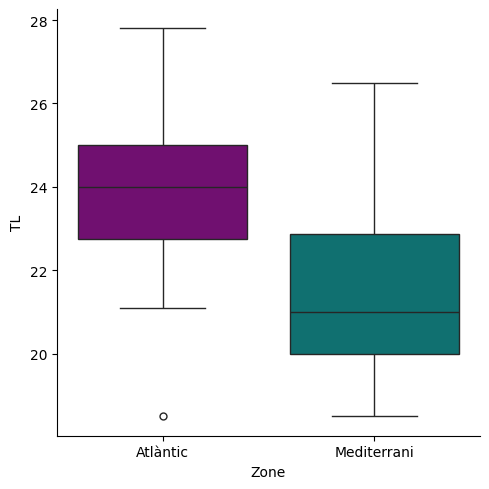

In [58]:
sns.catplot(data=datos, x='Zone', y='TL', kind='box',hue='Zone',palette={'Atlàntic':'purple', 'Mediterrani':'teal'})

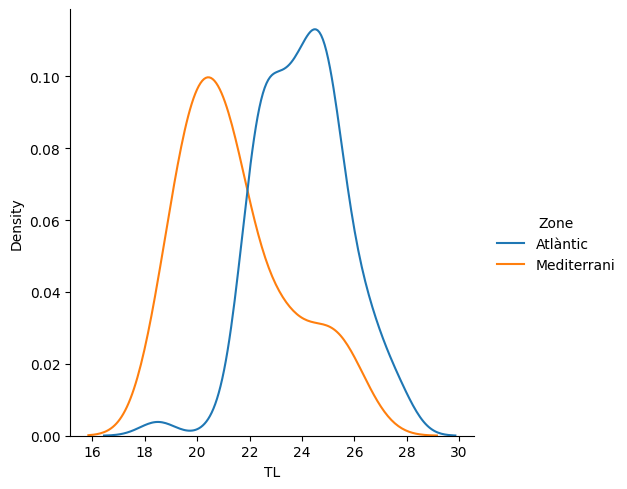

In [30]:
sns.displot(data=datos, 
            x='TL', 
            kind='kde', 
            hue='Zone')

Total length and weight relationship

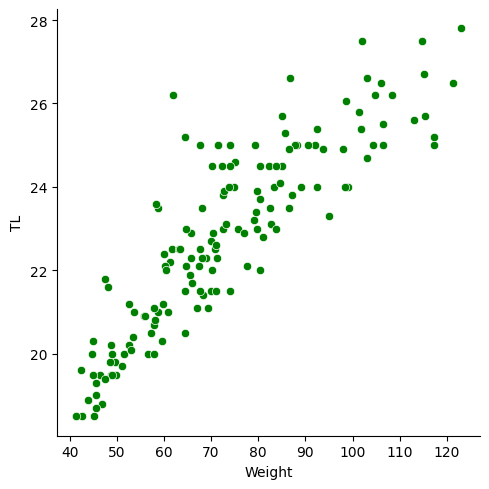

In [64]:
sns.relplot(data=datos, x='Weight', y='TL', color='green')

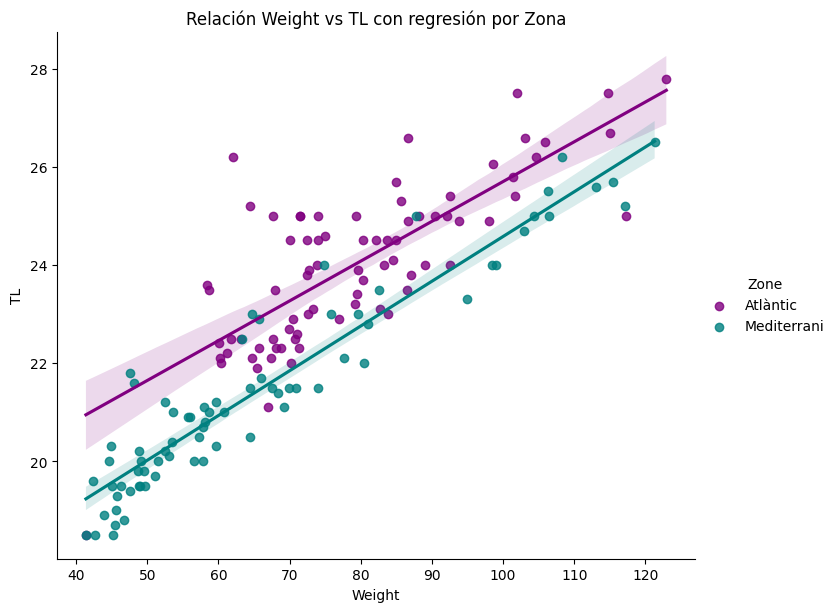

In [56]:
sns.lmplot(data=datos, x='Weight', y='TL', hue='Zone', height=6, aspect=1.2, palette={'Atlàntic':'purple', 'Mediterrani':'teal'})
plt.title('Relación Weight vs TL con regresión por Zona')
plt.show()

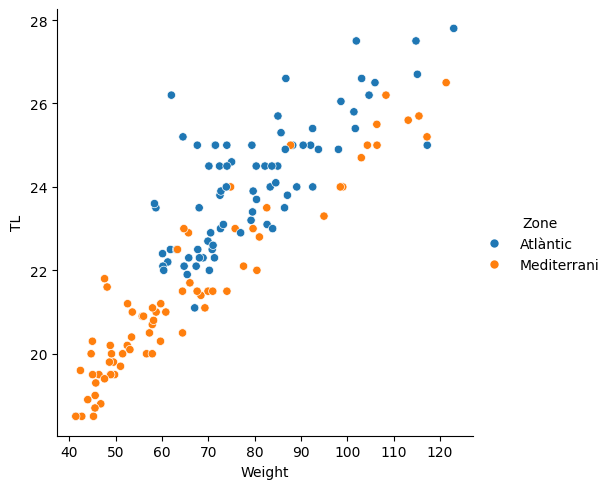

In [29]:
sns.relplot(data=datos, 
            x='Weight', 
            y='TL',
            hue='Zone')

In [40]:
datos.Maturity = datos.Maturity.str.strip()

In [42]:
datos

,Zone,TL,Weight,Sex,Maturity,Age
0,Atlàntic,24.0,83.33,F,M,1.5
1,Atlàntic,24.1,84.54,F,M,3.0
2,Atlàntic,25.0,92.06,F,M,1.5
3,Atlàntic,23.1,82.66,M,M,2.5
4,Atlàntic,26.6,103.07,F,M,5.0
...,...,...,...,...,...,...
147,Mediterrani,25.0,106.39,I,I,2.5
148,Mediterrani,20.0,49.08,I,I,1.0
149,Mediterrani,21.1,57.93,I,I,3.0
150,Mediterrani,20.1,53.05,I,I,3.5


In [44]:
inds = len(datos)
inds

152

In [ ]:
# Separate data in zones
atlantic = datos[datos['Zone'] == 'Atlàntic']
mediterranean = datos[datos['Zone'] == 'Mediterrani']

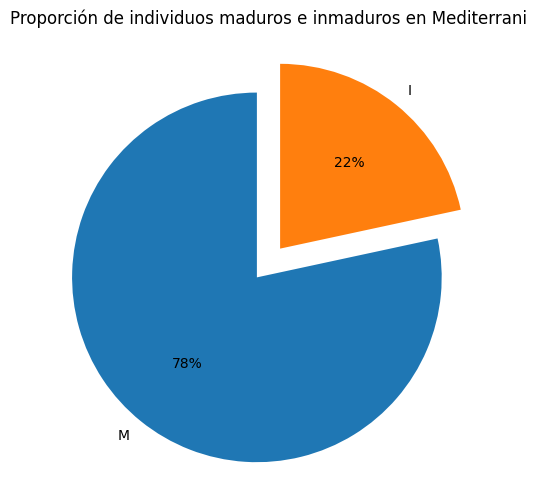

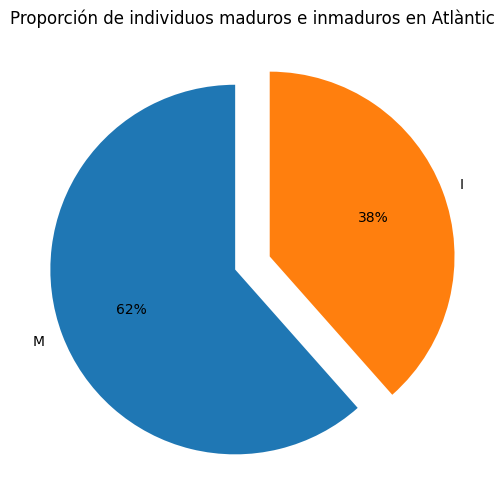

In [ ]:
# Count mature and inmature indivuals in Atlantic
counts_atlantic = atlantic['Maturity'].value_counts()
labels_atlantic = counts_atlantic.index.tolist()
sizes_atlantic = counts_atlantic.values.tolist()
explode_atlantic = [0.1] * len(labels_atlantic)

# Count mature and inmature indivuals in Mediterranean
counts_mediterranean = mediterranean['Maturity'].value_counts()
labels_mediterranean = counts_mediterranean.index.tolist()
sizes_mediterranean = counts_mediterranean.values.tolist()
explode_mediterranean = [0.1] * len(labels_mediterranean)

#Create piecharts
plt.figure(figsize=(6,6))
plt.pie(sizes_mediterranean, labels=labels_mediterranean, autopct='%.0f%%', explode=explode_mediterranean, startangle=90)
plt.title('Proportion of individuals by maturity in the Mediterranean')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(sizes_atlantic, labels=labels_atlantic, autopct='%.0f%%', explode=explode_atlantic, startangle=90)
plt.title('Proportion of individuals by maturity in the Atlantic')
plt.show()

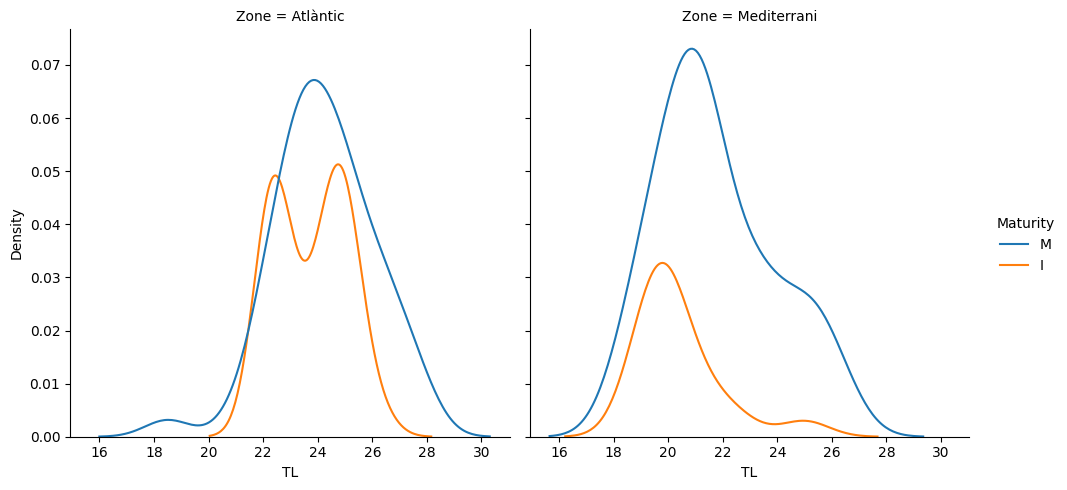

In [31]:
sns.displot(data=datos, 
            x='TL', 
            kind='kde', 
            hue='Maturity',
            col='Zone')

Text(0.5, 1.0, 'Mediterranean')

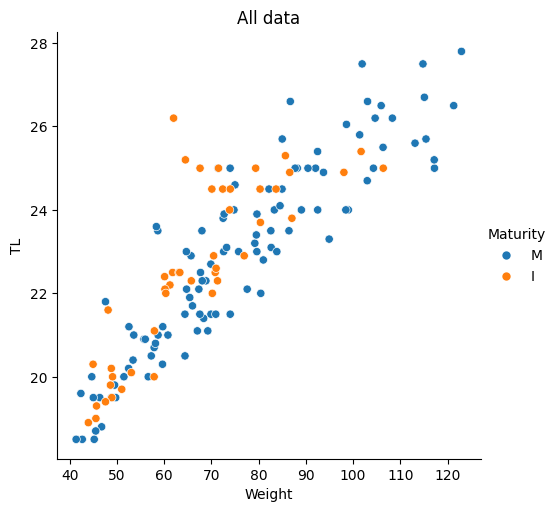

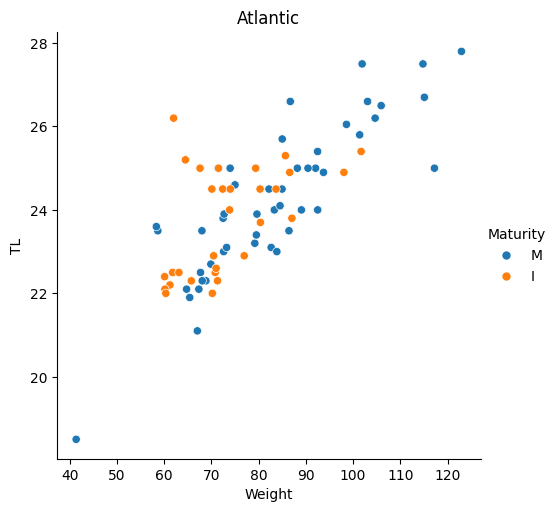

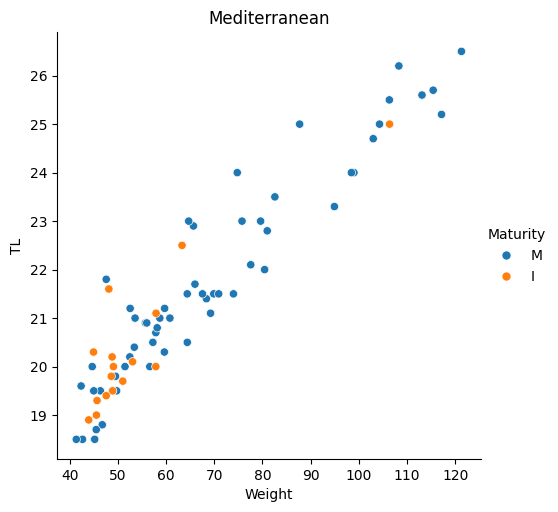

In [68]:
sns.relplot(data=datos, x='Weight', y='TL', hue='Maturity')
plt.title("All data")
sns.relplot(data=atlantic, x='Weight', y='TL', hue='Maturity')
plt.title("Atlantic")
sns.relplot(data=mediterranean, x='Weight', y='TL', hue='Maturity', )
plt.title("Mediterranean")

Age and maturity

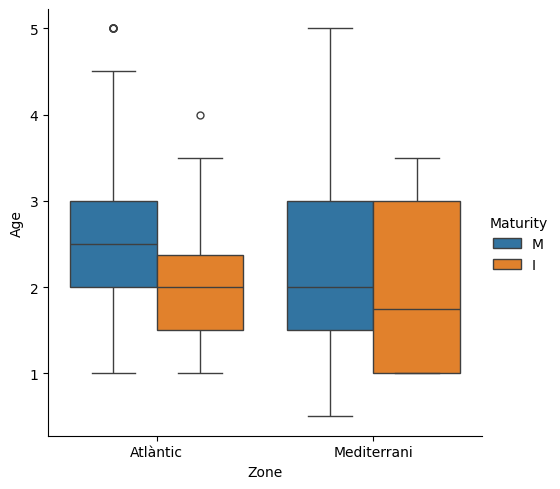

In [32]:
sns.catplot(data=datos, x='Zone', y='Age', hue='Maturity', kind='box')

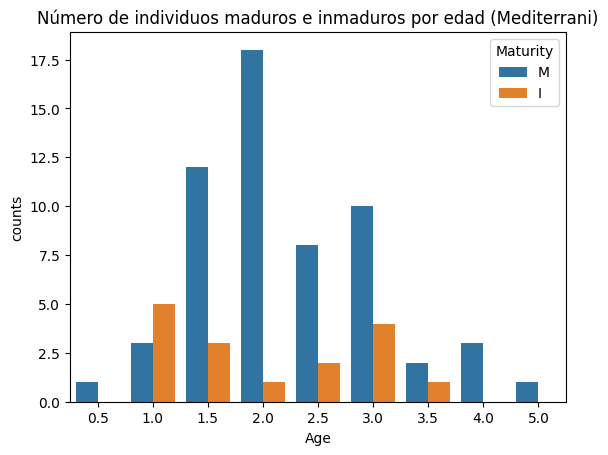

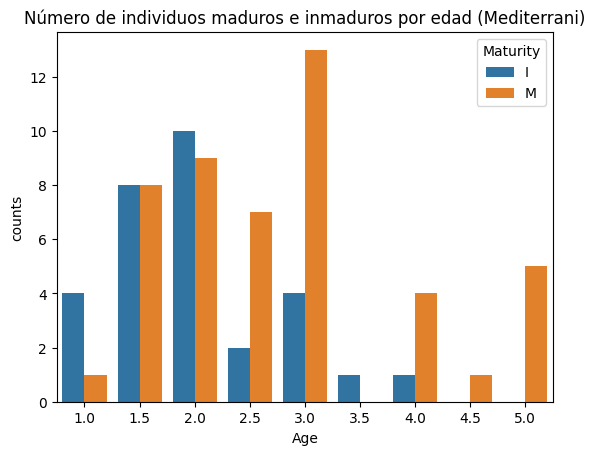

In [72]:
# Group by age and maturity and count individuals
conteosM = mediterranean.groupby(['Age', 'Maturity']).size().reset_index(name='counts')
conteosA = atlantic.groupby(['Age', 'Maturity']).size().reset_index(name='counts')
# Create barplot
sns.barplot(data=conteosM, x='Age', y='counts', hue='Maturity')
plt.title('Número de individuos maduros e inmaduros por edad (Mediterrani)')
plt.show()

sns.barplot(data=conteosA, x='Age', y='counts', hue='Maturity')
plt.title('Número de individuos maduros e inmaduros por edad (Mediterrani)')
plt.show()

